# 作业1
## 逻辑回归简介


逻辑回归直接对分类概率进行建模，并未对数据分布进行建模，是一类判别式模型。
逻辑回归主要用于分类问题，我们以二分类为例。对于给定线性可分样本，我们可以找到一个超平面将样本分类，如下图。
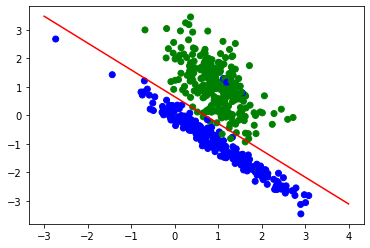

数据有 M 个样本， 每个样本中的 $X_i$ 为2维，$y_i$为类别标签，取值{0,1}。
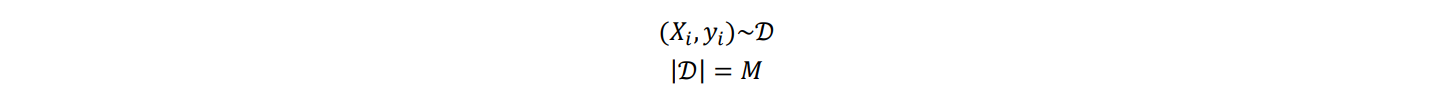

为了方便处理偏置项，将 X 与 W 做增广处理：
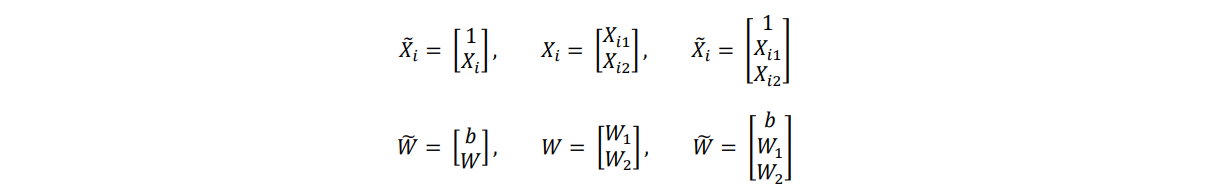

计算线性函数的结果$z_i$：
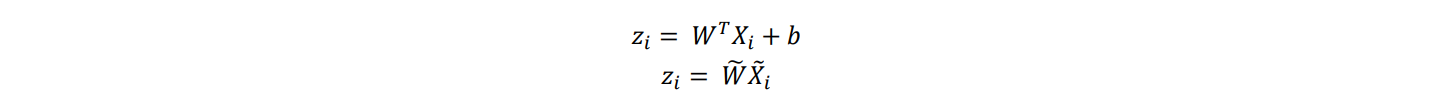

将线性函数的结果$z_i$作为 sigmoid 函数的输入计算后验概率的估计$p$：
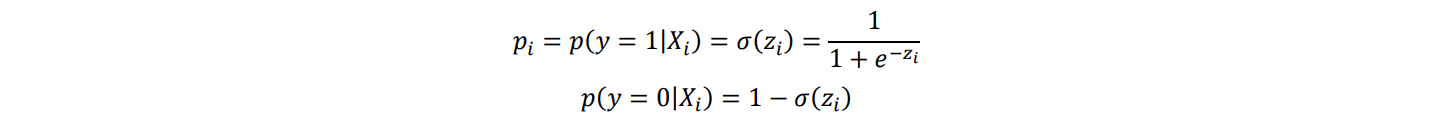

分类问题转化为对数几率的线性回归模型：
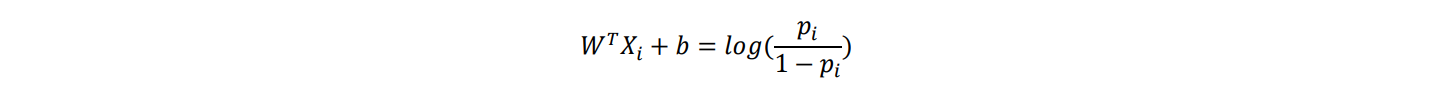

由样本数据的似然函数转为损失函数，似然函数的最大化等效为损失函数最小化。损失函数的形式为：
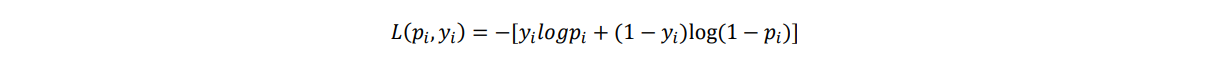
损失函数的梯度，以及参数的更新：
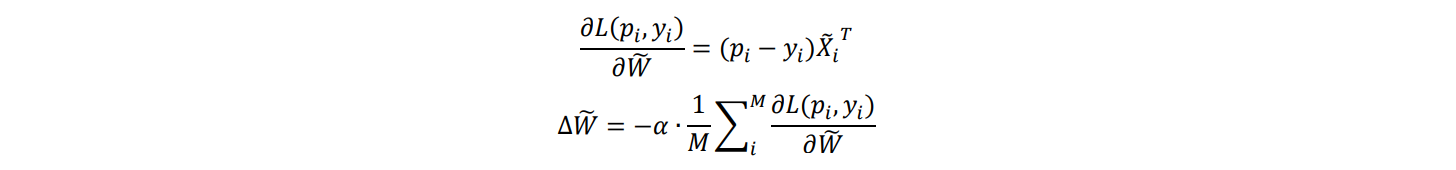

### 模型参数优化

## 使用 NumPy 从头开始实现
根据上面结论中的公式，补全下面的代码。需要补全的地方以 ########## 表示(共4处)。

### 导入需要的库
包括numpy，matplotlib 的 pyplot 子库， sklearn 的 make_classification 函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### 定义函数
#### 定义 sigmoid 函数
${sigmoid(z)=\frac{1}{1+e^{-z} } }$

In [62]:

# 计算 z 对应的后验概率估计 p = sigmoid(z)，使用向量形式
def sigmoid(z):
    # 输入为尺寸为(500,1)， 输出为尺寸为(500,1)
    return 1 / (1 + np.exp(-z))

#### 定义正向计算函数
计算从输入 X 到损失函数输出

${z=W^{T} X}$

${p = sigmoid(z)=\frac{1}{1+e^{-z} } }$

${L(p,y)=-[y log p + (1-y)log(1-p)]}$



In [92]:
def forward(X, y, W):
    '''
    计算从输入 X 到损失函数。
    首先计算 z = W~X~， 
    其次计算 z 对应的后验概率估计 p，即样本输入 X 的属于第一类的概率预测，
    最后输出损失函数
    '''
    
    # 计算 z = W~X~，使用向量形式
    # z尺寸为(500,1)
    z = X.dot(W)
    
    # 计算 z 对应的后验概率估计 p = sigmoid(z)
    p = sigmoid(z)
    
    # 计算损失函数，尺寸为(1,1)
    M = y.shape[0]
    cost = -1/M * np.sum(y * np.log(p) + (1.0 - y) * np.log(1.0 - p))
    return cost

#### 定义参数优化函数
使用梯度下降方法优化模型参数

${z=W^{T} X}$

${p = sigmoid(z)=\frac{1}{1+e^{-z} } }$

${L(p,y)=-[y log p + (1-y)log(1-p)]}$

${\frac{\partial L(p,y)}{\partial W} =(p-y)X^{T} }$

${W = W - \alpha \cdot \frac{1}{M} { \sum \frac{\partial L(p,y)}{\partial W}} = W - \alpha \cdot \frac{1}{M} {\sum (p-y)X^{T}}}$

In [87]:
grad = np.dot(X.T, p-y) / M

In [89]:
W = W - (learning_rate) * grad

In [90]:
W

array([[ 0.00561514],
       [-0.00758087],
       [-0.00943826]])

In [81]:
def optimize(X, y, W, learning_rate, num_iterations):
    cost_history = np.zeros((num_iterations,1))

    for i in range(num_iterations):
        #计算参数更新，尺寸为(3,1)
        z = X.dot(W)
        p = sigmoid(z)
        M = y.shape[0]
        grad = np.dot(X.T, p-y) / M
        W = W - (learning_rate) * grad
        cost_history[i] = forward(X, y, W)

    return (cost_history, W)

#### 定义预测函数
给定模型参数，输出预测属于第一类的概率

In [82]:
# 定义预测函数可以查看函数输出是否正确
def predict(X, W):
    return np.round(sigmoid(X.dot(W)))

### 训练
#### 生成数据

(500, 2) (500, 1)


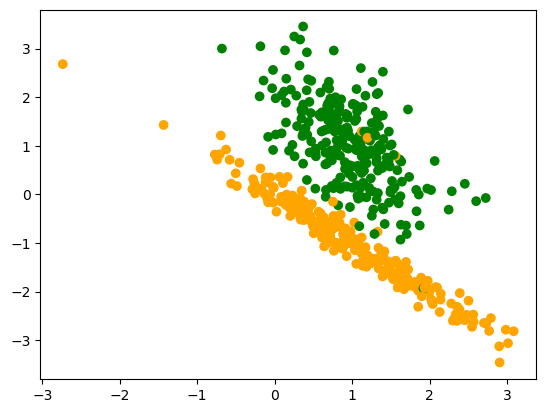

In [83]:
# 使用 sklearn 的 make_classification()函数来生成训练数据：
X_raw, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state=1)

y = y.reshape(y.shape[0],-1)
print (X_raw.shape, y.shape)#应为(500,2), (500,1)

# 使用matplotlib库的子库pyplot的工具画图， 画出输入 X 的散点图， 以不同的颜色来显示不同的类别
plt.scatter(X_raw[:,0], X_raw[:,1], color=['orange' if label else 'green' for label in y.reshape(-1)])
plt.show()

#### 将样本输入 X_raw 做增广处理

In [84]:
# 将样本输入 X_raw 做增广处理得到X
X = np.hstack((np.ones((X_raw.shape[0],1)),X_raw))
print(X.shape) # 应为(500, 3)

(500, 3)


#### 训练过程

Initial Cost is: 0.6899557486279664 

Optimal Parameters are: 
 [[ 3.44638702]
 [-4.9878268 ]
 [-5.00953743]] 



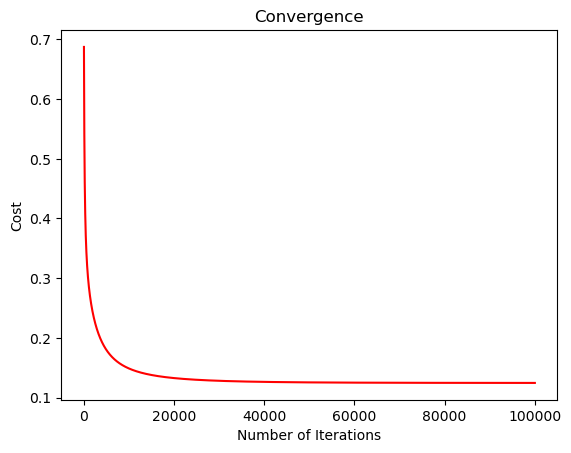

In [99]:
# 得到输入特征的维数n
n = np.size(X,1)

# 随机初始尺寸为(n,1)的参数
W = np.random.normal(0,0.01, [n,1])

# 指定梯度下降迭代次数
num_iterations = 100000

# 学习率即迭代步长
learning_rate = 1e-2 

# 调用forward函数计算初始参数下的损失函数
initial_cost = forward(X, y, W) 

# 查看初始损失函数
print("Initial Cost is: {} \n".format(initial_cost))

# 调用optimize函数进行迭代优化参数
(cost_history, W_optimal) = optimize(X, y, W, learning_rate, num_iterations)

# 查看优化后的参数
print("Optimal Parameters are: \n", W_optimal, "\n") 

# 画出学习曲线
plt.figure() 
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

### 可视化分类面


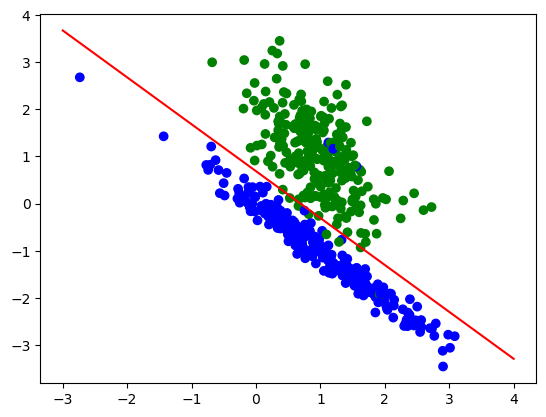

In [100]:
# 由训练好的参数计算分类面(一条直线)的函方程
a = -(W_optimal[1] / W_optimal[2]) # 斜率
b = -(W_optimal[0] / W_optimal[2]) # 截距

# 先画出样本点作参考
plt.scatter(X_raw[:,0], X_raw[:,1], color=['blue' if label else 'green' for label in y.reshape(-1)])

# 再画出分类面（直线）

# 定点间隔取横坐标 x1，使用 np.linspace() 函数
x1 = np.linspace(-3,4,2)

# 由x1 计算纵坐标 x2
x2 = b + (a * x1)

plt.plot(x1, x2, c="r")
plt.show()